# Fig. 5 panel B remodeling score

In [1]:
import os, sys
from pathlib import Path
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams["pdf.fonttype"] = 42

script_path = Path.cwd().parent.parent.parent / "script"
data_path = Path.cwd().parent.parent.parent / "data"
sys.path.append(str(script_path))

output_folder = Path.cwd() / "output"
os.makedirs(output_folder, exist_ok=True)

### Load data

In [2]:
%store -r fig5_timestamp
print(f"Timestamp: {fig5_timestamp}")

# load the number of seeds used in the alignedUMAP
try:
    %store -r n_seeds
    print(f"n_seeds: {n_seeds}")
except:
    print("n_seeds not found. please specify (below) the number of bootstrap seeds (same as that used in Fig5_A_aligned_umap.ipynb)")
    n_seeds = 200

Timestamp: 2023-10-21-for-figures
n_seeds: 50


In [3]:
input_path = Path.cwd().parent / "panel_A" / "3.aligned_umap" / "output" / f"{fig5_timestamp}_AlignedUMAP_embeddings_and_distances.csv"

try:
    df = pd.read_csv(input_path, low_memory=False)
except FileNotFoundError:
    print(f"File {input_path} not found.\n please run the aligned_umap notebooks first.")
except pd.errors.ParserError:
    print(f"There was an error parsing the CSV file at {input_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### Plot

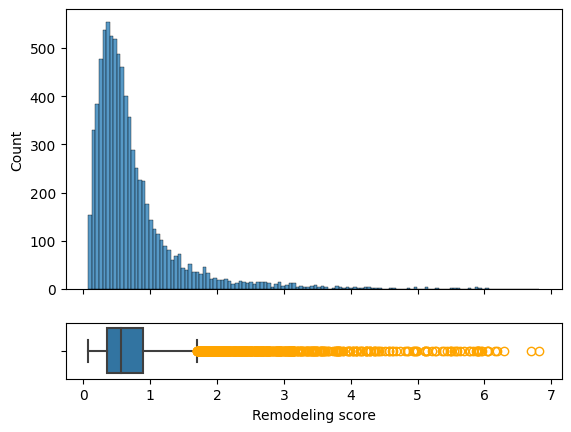

<Figure size 640x480 with 0 Axes>

In [4]:
data = df[f"10d_mean_distance_traveled ({n_seeds} bootstraps)"] 

# create grid layout
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1])

# histogram
ax0 = plt.subplot(gs[0])
sns.histplot(data, ax=ax0, kde=False)
ax0.set(xlabel='')
# turn off x tick labels
ax0.set_xticklabels([])

# boxplot
ax1 = plt.subplot(gs[1])
sns.boxplot(x=data, ax=ax1, flierprops=dict(marker='o', markeredgecolor="orange", markerfacecolor='none', markersize=6))
ax1.set(xlabel='Remodeling score')

# display the plot
plt.show()

# save the plot
output_path = output_folder / f"{fig5_timestamp}_panel_B_remodeling_score.pdf"
plt.savefig(output_path, bbox_inches='tight', dpi=300)

In [5]:
# calculate cutoff

# calculate 1.5 * IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
one_point_five_IQR = 1.5 * IQR

# calculate cutoff
cutoff = Q3 + one_point_five_IQR

print(f"cutoff = {cutoff}")

cutoff = 1.7002298823304771
